[Census Data for Pasadena, Compton, Pomona](https://www.census.gov/quickfacts/fact/table/pasadenacitycalifornia,comptoncitycalifornia,pomonacitycalifornia/PST045222)

## Reading in the Data 

We first use pandas to read in the data. 

Remember the directory structure:

```
- W5_1_AirQuality-|
                  |- code |- analysingAQData.ipnyb
                  |
                  |
                  |- data |- EPA_AQI_Compton_1302_20200101_20201231.csv
                          |- EPA_AQI_Pasadena_2005_20200101_20201231.csv
                          |- EPA_AQI_Pomona_1701_20200101_20201231.csv
```

This means we have to read 3 files in the data directory. We can either do this manually by reading each file into a named dataframe. 

When using `pd.read_csv()` we want to make sure that this is read as a time series with the times on the index. So we need to use the `parse_dates` and `index_col` parameters on the column containing the dates called `DateTime`

In [319]:
import pandas as pd

# insert the correct path to the file in the line below
aqs_Compton2023 = pd.read_csv('../data/ad_viz_plotval_data_EPA_AQI_Compton_2023.csv',
                #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                parse_dates = ['Date'],
                #  Set DATE as the index so you can subset data by time period
                index_col = ['Date']
                  )
aqs_Compton2023

# insert the correct path to the file in the line below
aqs_Compton1999 = pd.read_csv('../data/ad_viz_plotval_data_EPA_AQI_Compton_1999.csv',
                #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                parse_dates = ['Date'],
                #  Set DATE as the index so you can subset data by time period
                index_col = ['Date']
                  )
aqs_Compton1999

# insert the correct path to the file in the line below
#aqs_Pomona = pd.read_csv('',
                #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                # parse_dates = [''],
                #  Set DATE as the index so you can subset data by time period
                # index_col = ['']
                #   )
#aqs_Pomona


,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
Date,,,,,,,,,,,,,,,,,,,
1999-01-01,AQS,60371301,1,0.000000,ug/m3 LC,0.000000,Lynwood,1,100,88101,PM2.5 - Local Conditions,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,33.92899,-118.21071
1999-01-02,AQS,60371301,1,0.000000,ug/m3 LC,0.000000,Lynwood,1,100,88101,PM2.5 - Local Conditions,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,33.92899,-118.21071
1999-01-03,AQS,60371301,1,41.800000,ug/m3 LC,117.000000,Lynwood,1,100,88101,PM2.5 - Local Conditions,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,33.92899,-118.21071
1999-01-04,AQS,60371301,1,50.433333,ug/m3 LC,130.333333,Lynwood,1,100,88101,PM2.5 - Local Conditions,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,33.92899,-118.21071
1999-01-05,AQS,60371301,1,59.066667,ug/m3 LC,143.666667,Lynwood,1,100,88101,PM2.5 - Local Conditions,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,33.92899,-118.21071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-27,AQS,60371301,1,41.933333,ug/m3 LC,117.000000,Lynwood,1,100,88101,PM2.5 - Local Conditions,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,33.92899,-118.21071
1999-12-28,AQS,60371301,1,44.616667,ug/m3 LC,123.500000,Lynwood,1,100,88101,PM2.5 - Local Conditions,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,33.92899,-118.21071
1999-12-29,AQS,60371301,1,47.300000,ug/m3 LC,130.000000,Lynwood,1,100,88101,PM2.5 - Local Conditions,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,33.92899,-118.21071


However imagine having many files. Reading these in manually does not sound like a good idea. 

We can use a loop to make things easier. 

There is a tool called `glob` that can be used to find files in a directory using wildcard characters. For example, try out what `glob.glob('../data/*.csv')` will do. What does the `*` do?

In [320]:
import glob

# Applying an additional function below to ensure that it
    # only recognizes only the two files I want it to so
    # that when we use the 'DataDict' navigational
    # functions below it doesn't run into errors with
    # reading the other files b/c the other files located
    # in the same folder that I'm referencing (the ones 
    # from our in-class activity),
    # don't have 6 underscores in there filepath, so 
    # when it attempts to deferentiate all the files 
    # to the sixth underscore, it's not going to like
    # those other ones too much.

# ALSO!! FIRSTTT make sure to RUN the code: 
#   glob.glob('../data/*.csv)
#   And then, directly copy and paste the output files
#   into the "desired_files" list below or else the
#   "[file for file ....etc]" won't work and will output
#   empty brackets.
desired_files = [
    '../data\\ad_viz_plotval_data_EPA_AQI_Compton_1999.csv',
    '../data\\ad_viz_plotval_data_EPA_AQI_Compton_2023.csv'
]

# Compton only started taking annual data in 2009
# And daily annual data started in 2020

# try out glob one the line below
all_files = glob.glob('../data/*.csv')
Dfiles = [file for file in all_files if file in desired_files]

Dfiles

['../data\\ad_viz_plotval_data_EPA_AQI_Compton_1999.csv',
 '../data\\ad_viz_plotval_data_EPA_AQI_Compton_2023.csv']

Here is a neat way of reading many data files at the same time. We are loading them into a Python Dictionary. 

Dictionaries are data containers in which data can be looked up with a key. Empty dictionaries are created like this: `DictName = {}`. It is then possible to read and assign the data for each city. 

In [321]:
#files = glob.glob('../data/*.csv')

files = Dfiles

DataDict = {}
for i, file in enumerate(files):
    cityName= file.split('_')[6] # This extracts the city name from the file name by splitting the string at _
    print(cityName)
    DataDict[cityName]= pd.read_csv(file,
                    #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                    parse_dates = ['Date'],
                    #  Set DATE as the index so you can subset data by time period
                    index_col = ['Date'])

DataDict
                

Compton
Compton


{'Compton':            Source   Site ID  POC  Daily Mean PM2.5 Concentration     UNITS  \
 Date                                                                         
 2023-01-01    AQS  60371302    1                             6.8  ug/m3 LC   
 2023-01-02    AQS  60371302    1                            10.2  ug/m3 LC   
 2023-01-03    AQS  60371302    1                             4.0  ug/m3 LC   
 2023-01-04    AQS  60371302    1                             3.4  ug/m3 LC   
 2023-01-05    AQS  60371302    1                             5.8  ug/m3 LC   
 ...           ...       ...  ...                             ...       ...   
 2023-12-27    AQS  60371302    3                            23.3  ug/m3 LC   
 2023-12-28    AQS  60371302    3                            22.0  ug/m3 LC   
 2023-12-29    AQS  60371302    3                            24.7  ug/m3 LC   
 2023-12-30    AQS  60371302    3                             8.3  ug/m3 LC   
 2023-12-31    AQS  60371302    3        

## Exploratory Analysis 

For now let's focus on a single city: Compton. 

Apply the `.columns` attribute to the `aqs_Compton` data frame to see all the column names.  

**Can you guess what each of them is?**

In [322]:
# Complete the line below to see the column names 
aqs_Compton1999.columns
#aqs_Compton1999.columns

Index(['Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration', 'UNITS',
       'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
       'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME',
       'STATE_CODE', 'STATE', 'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE',
       'SITE_LONGITUDE'],
      dtype='object')

Let's look at some important columns. A good way of doing so is using the `.unique()` method, returns a list of unique values. For example we can apply this to the `['parameter']` column to see that we have _NO~2~_, _Ozone_, and _PM2.5_ data in our data frame. We better separate these out later! 

In [323]:
print(aqs_Compton1999['AQS_PARAMETER_DESC'].unique())

['PM2.5 - Local Conditions']


Let's look at some more columns. Apply `.unique()` to the `['qualifier']` and `['sample_duration']` columns. 

In [324]:
# Complete two lines below to apply the .unique() method to ['qualifier'] and ['sample_duration']
# print(aqs_Compton1999['qualifier'].unique())
# print(aqs_Compton1999['sample_duration'].unique())


<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>

Look at the printed output. 
    
What do these mean?

What does this mean for our analysis? 

</div>

Some data are marked. Let' have a look: 

A nice thing about pandas is that we can select data on a condition. You have already learned how to select data by time using `.loc[]`. Remember that `aqs_Compton.loc['2020-07-01']` will only show data from July 1st. 

The `.loc[]` selector can also be used for conditions. For example, if we only want data for the period, where fireworks happened we can specify that we want all the data for which `aqs_Compton['qualifier'] == 'IH - Fireworks.'` **(Note the double == sign for a logical comparison)**

In [325]:
aqs_Compton1999[['AQS_PARAMETER_DESC', 'Daily Mean PM2.5 Concentration', 'UNITS']]

,AQS_PARAMETER_DESC,Daily Mean PM2.5 Concentration,UNITS
Date,,,
1999-01-01,PM2.5 - Local Conditions,0.000000,ug/m3 LC
1999-01-02,PM2.5 - Local Conditions,0.000000,ug/m3 LC
1999-01-03,PM2.5 - Local Conditions,41.800000,ug/m3 LC
1999-01-04,PM2.5 - Local Conditions,50.433333,ug/m3 LC
1999-01-05,PM2.5 - Local Conditions,59.066667,ug/m3 LC
...,...,...,...
1999-12-27,PM2.5 - Local Conditions,41.933333,ug/m3 LC
1999-12-28,PM2.5 - Local Conditions,44.616667,ug/m3 LC
1999-12-29,PM2.5 - Local Conditions,47.300000,ug/m3 LC


<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>

Look at the printed output. 
    
What do we learn from this? 

</div>

Let's find out which dates and parameters are affected by wildfire smoke? 

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>

Find the data that is tagged as affected by wildfires!
(Hint: Look at the code above and the string for wildfires)

</div>

In [326]:
# Complete the code below for the challenge  (1 line)
#aqs_Compton[['parameter','sample_measurement','units_of_measure']].loc[aqs_Compton['qualifier'] == 'IT - Wildfire-U. S.']

### Quick Summary

Let's summarize what we have learned so far. 

- We have one csv/ dataframe for each station. 
- The Compton dataframe contains PM2.5, Ozone, and NO~2~ data. 
    - Is this true for all stations? 
- Some data are hourly, some are daily (24h). 
- Some data are flagged for quality, and special events. 
    - This means we should remove data for periods that are flagges as not valid. 

## Next Steps

Our next steps, depend on our research question. 

For now, let's assume that we want to compare air quality data for the 3 cities and we focus on Ozone for now. 

Then it would probably be a good idea, to get the ozone data for all 3 cities into a new data frame called `ozoneData`. 

We know that the actual measurement is stored in the `['sample_measurement']` column and that we can use the `.loc[]` selector to only select data for which the `['parameter']` column contains the label `Ozone`. 

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>

Can you complete the code below to do just that?

</div>


In [327]:
##ozoneData = pd.DataFrame() # This creates a new dataframe. 
# Complete the line below with the correct .loc[] selector
##ozoneData['Compton']=aqs_Compton['sample_measurement'].loc[aqs_Compton['parameter']=='Ozone']
# Add two more lines below to do the same for Pasadena and Pomona. 
##ozoneData['Pasadena']=aqs_Pasadena['sample_measurement'].loc[aqs_Pasadena['parameter']=='Ozone']
##ozoneData['Pomona']=aqs_Pomona['sample_measurement'].loc[aqs_Pomona['parameter']=='Ozone']
##ozoneData

PM25Data = pd.DataFrame()
PM25Data['Compton1999']=aqs_Compton1999['Daily Mean PM2.5 Concentration'].loc[aqs_Compton1999['AQS_PARAMETER_DESC']=='PM2.5 - Local Conditions']
PM25Data

,Compton1999
Date,
1999-01-01,0.000000
1999-01-02,0.000000
1999-01-03,41.800000
1999-01-04,50.433333
1999-01-05,59.066667
...,...
1999-12-27,41.933333
1999-12-28,44.616667
1999-12-29,47.300000


We can now try to compare the 3 stations. Let's start getting the statistics using `.describe()`.

In [328]:
# Apply the .describe to the dataframe with ozone data. 
PM25Data.describe()

,Compton1999
count,365.000000
mean,24.454932
std,10.835736
min,0.000000
25%,16.966667
50%,21.900000
75%,30.566667
max,67.700000


A plots might also help. Because line plots, don't show much, it is better to aggregate the data into a box plot. 

<Axes: >

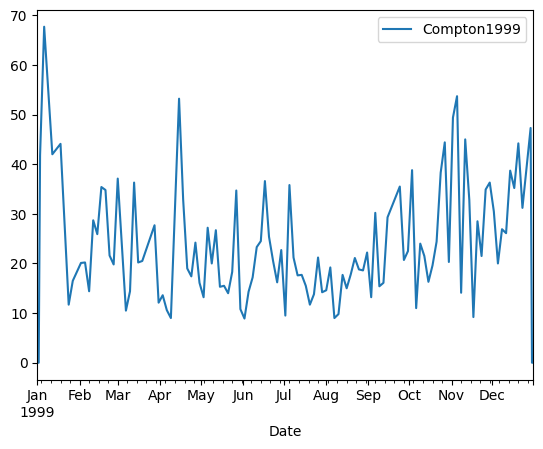

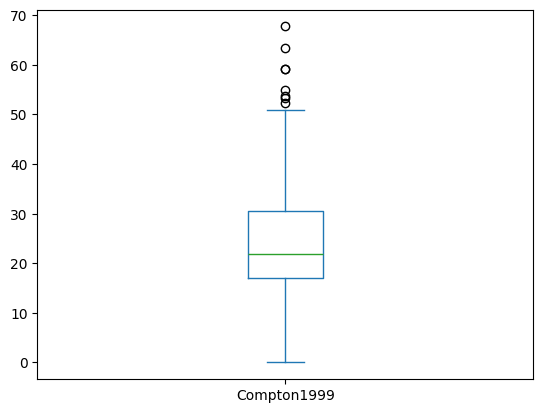

In [329]:
# Modify the code below to create box-plots for the 3 stations. Extra cheers for labels etc.
PM25Data.plot()
PM25Data.plot(kind='box')

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>

How would you interpret this plot?

</div>

If we assing another column with values for month, we can also use the box plot functionality to investigate the annual cycle of ozone by separating the data `by='month'`

Compton1999    Axes(0.125,0.11;0.775x0.77)
dtype: object

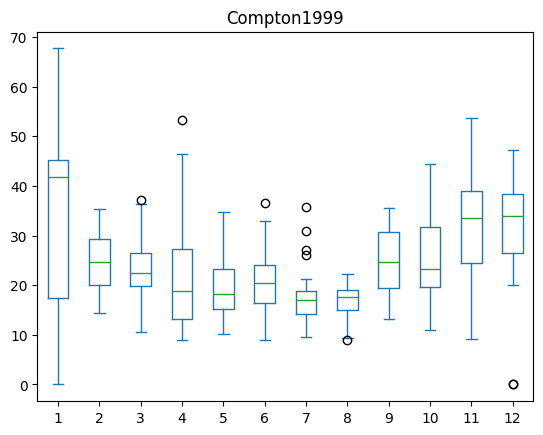

In [330]:
PM25Data['month']=PM25Data.index.month
PM25Data.plot(kind='box', by='month')

## Calculating Air Quality Index

Remember the [Air Quality Index](https://www.airnow.gov/aqi/) from your classes? 

It turns out that calculating the AQI is a bit more complicated than I remember and [every country uses their own scale](https://en.wikipedia.org/wiki/Air_quality_index). In the U.S., the EPA calculates the AQI for each criteria air pollutant using a [table of thresholds](https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf) for each category and then uses the highes criteria air pollutant AQI as the total AQI.  

For the sake of simplicity, lets define our own ISAT 420 AQI. In our case, let's use a simple scaling based on the [National Ambient Air Quality Standards](https://www.epa.gov/criteria-air-pollutants/naaqs-table). We define each component AQI as

$AQI = \frac{\text{Pollutant Concentration}}{\text{Reference Standard}} \times 100$

We use the following reference standards.

Ozone(1hr)  = 0.124 ppm

PM2.5(24hr) = 35.4 $\mu g\,m^{-3}$

NO2(1hr) = 100 ppb


Our workflow will be as follows. We will

- focus on Compton, because it has data for NO2, PM2.5, and Ozone. 
    - We need to confirm that our units are the same 
- caclulate each component AQI
- create a new dataframe with daily resolution that contains all component AQIs
- determine AQI as the maximum 


In [331]:
ozoneStandard = 0.124
pmStandard = 35.4
NO2Standard = 100

# Add two more lines below to calculate aqi for pm2.5 and NO2
#aqi_ozone = aqs_Compton['sample_measurement'].loc[aqs_Compton['parameter']=='Ozone']/ozoneStandard*100
aqi_pm=aqs_Compton1999['Daily Mean PM2.5 Concentration'].loc[aqs_Compton1999['AQS_PARAMETER_DESC']=='PM2.5 - Local Conditions']/pmStandard*100

# Add two more lines below to calculate aqi for pm2.5 and NO2

#aqi_pm = aqs_Compton['sample_measurement'].loc[aqs_Compton['parameter']=='PM2.5 - Local Conditions']/pmStandard*100

#aqi_no2 = aqs_Compton['sample_measurement'].loc[aqs_Compton['parameter']=='Nitrogen dioxide (NO2)']/NO2Standard*100


We should note that ozone and NO2 are hourly AQIs and PM2.5 is sampled daily. So we should resample all data to daily. This will also take care with periods of missing data. 

In [332]:
#print(aqi_ozone.head())
print(aqi_pm.head())
#print(aqi_no2.head())

Date
1999-01-01      0.000000
1999-01-02      0.000000
1999-01-03    118.079096
1999-01-04    142.467043
1999-01-05    166.854991
Name: Daily Mean PM2.5 Concentration, dtype: float64


Let's create our new aqi dataframe with each data resampled to 1D. `.resample('1D').mean()` would average each value to get a daily value. It is probably a better idea to take the daily max instead `.max()`.

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>

Complete the code below to create our aggregated AQI Dataframe

</div>

In [333]:
aqi_Compton1999 = pd.DataFrame()
# Modify the line below to resample to 1D using the maximum value in each day. 
#aqi_Compton['Ozone']= aqi_ozone.resample('1D').max()
# Complete two lines below to add PM2.5 and NO2
aqi_Compton1999['PM']= aqi_pm.resample('1D').max()
#aqi_Compton['NO2']= aqi_no2.resample('1D').max()
aqi_Compton1999

,PM
Date,
1999-01-01,0.000000
1999-01-02,0.000000
1999-01-03,118.079096
1999-01-04,142.467043
1999-01-05,166.854991
...,...
1999-12-27,118.455744
1999-12-28,126.035782
1999-12-29,133.615819


We can then find the maximum value of each row and assing this to a new column. 

In [337]:
aqi_Compton1999['AQI_Total']=aqi_Compton1999.max(axis=1)
aqi_Compton1999

,PM,AQI_Total
Date,,
1999-01-01,0.000000,0.000000
1999-01-02,0.000000,0.000000
1999-01-03,118.079096,118.079096
1999-01-04,142.467043,142.467043
1999-01-05,166.854991,166.854991
...,...,...
1999-12-27,118.455744,118.455744
1999-12-28,126.035782,126.035782
1999-12-29,133.615819,133.615819


Plotting this reveals, which variable is most responsible. 

<Axes: xlabel='Date'>

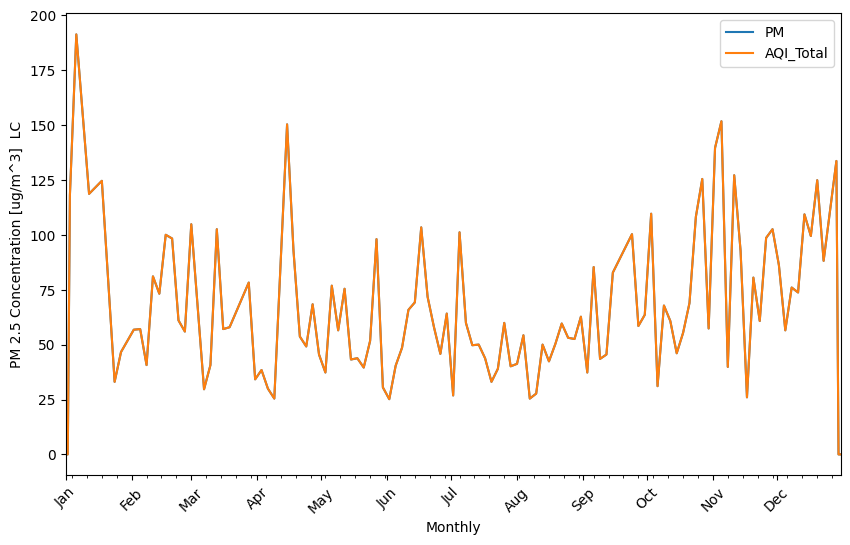

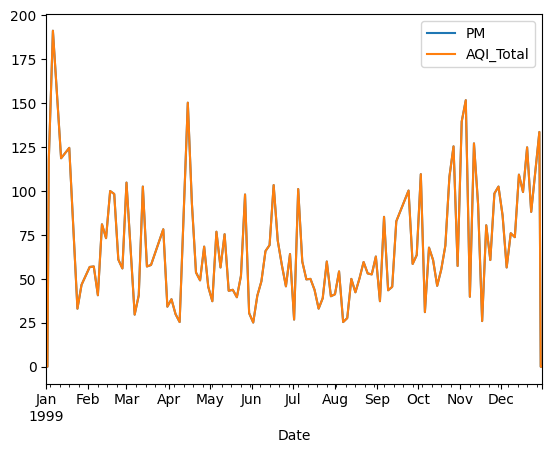

In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

import numpy as np

date_range = pd.date_range(start='1999-01-01', end='1999-12-31', freq='D')
aqi_pm = pd.Series(np.random.randint(0, 100, size=len(date_range)), index=date_range)

fig, ax = plt.subplots(figsize=(10, 6))
aqi_Compton1999.plot(ax=ax)

#ax = aqi_Compton1999.plot()

ax.set_xlabel("Monthly")
ax.set_ylabel("PM 2.5 Concentration [ug/m^3]  LC")

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xticks(rotation=45)
aqi_Compton1999.plot()

In [339]:
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good','Moderate','Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy','Hazardous']
aqi_Compton1999['AQI_Class']=pd.cut(aqi_Compton1999['AQI_Total'], bins, labels= labels)

In [340]:
aqi_Compton1999['AQI_Class'].value_counts()

AQI_Class
Moderate                          201
Good                              103
Unhealthy for Sensitive Groups     50
Unhealthy                           7
Very Unhealthy                      0
Hazardous                           0
Name: count, dtype: int64